**Run the following two cells before you begin.**

In [88]:
%autosave 10

Autosaving every 10 seconds


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Import data set
df = pd.read_csv(r"C:/Users/Hemant/Desktop/cleaned_data.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


**Run the following 3 cells to create a list of features, create a train/test split, and instantiate a random forest classifier.**

In [2]:
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default payment next month'].values,
    test_size=0.2, random_state=24
)

In [4]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None
)

In [5]:
# fit
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=4)

In [6]:
# Making predictions
predictions = rf.predict(X_test)

In [7]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      4178
           1       0.70      0.29      0.41      1155

    accuracy                           0.82      5333
   macro avg       0.77      0.63      0.65      5333
weighted avg       0.80      0.82      0.79      5333



**Create a dictionary representing the grid for the `max_depth` and `n_estimators` hyperparameters that will be searched. Include depths of 3, 6, 9, and 12, and 10, 50, 100, and 200 trees.**

In [8]:
# GridSearchCV to find optimal max_depth

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# parameters to build the model on
parameters = {'max_depth': [3,6,9,12],
              'n_estimators': [10,50,100,200]}

________________________________________________________________
**Instantiate a `GridSearchCV` object using the same options that we have previously in this course, but with the dictionary of hyperparameters created above. Set `verbose=2` to see the output for each fit performed.**

In [9]:
# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf_search = GridSearchCV(rf, parameters, cv=4, refit="roc_auc"
                         , return_train_score=True, verbose=2,
                        error_score=np.nan)


____________________________________________________
**Fit the `GridSearchCV` object on the training data.**

In [10]:
rf_search.fit(X_train, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.1s
[CV] max_depth=3, n_estimators=10 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... max_depth=3, n_estimators=10, total=   0.1s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.1s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.1s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.6s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.6s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.6s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.6s
[CV] max_depth=3, n_estimators=100 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:  2.4min finished


GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12],
                         'n_estimators': [10, 50, 100, 200]},
             refit='roc_auc', return_train_score=True, verbose=2)

___________________________________________________________
**Put the results of the grid search in a pandas DataFrame.**

In [14]:
# scores of GridSearch CV
scores = rf_search.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.120014,0.009790,0.005999,0.003464,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.817551,0.801050,0.817926,0.781133,0.804415,0.015071,15,0.821415,0.803163,0.812039,0.782549,0.804791,0.014372
1,0.577687,0.039014,0.025507,0.003348,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.791299,0.788299,0.821301,0.797824,0.799681,0.012949,16,0.794224,0.789161,0.817727,0.799925,0.800259,0.010780
2,1.170717,0.131326,0.043439,0.003425,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.815301,0.810051,0.819801,0.810203,0.813839,0.004039,13,0.818727,0.817415,0.815227,0.814176,0.816386,0.001787
3,2.428038,0.212298,0.081064,0.004088,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.812301,0.807613,0.798237,0.806639,0.806198,0.005070,14,0.813039,0.816227,0.797787,0.811676,0.809682,0.007063
4,0.191082,0.002075,0.006000,0.003464,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.815301,0.812863,0.823926,0.822018,0.818527,0.004578,11,0.825416,0.826291,0.823103,0.824614,0.824856,0.001173


**Find the best hyperparameters from the cross-validation.**

In [100]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [3, 6, 9, 12],
    'n_estimators': [10, 50, 100, 200] 
    }
# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 4, n_jobs = -1,verbose = 2)

In [101]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:  1.1min finished


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 6, 9, 12],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=2)

In [102]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8211992496295835 using {'max_depth': 9, 'n_estimators': 50}


________________________________________________________________________________________________________
**Create a `pcolormesh` visualization of the mean testing score for each combination of hyperparameters.**

<details>
    <summary>Hint:</summary>
    Remember to reshape the values of the mean testing scores to be a two-dimensional 4x4 grid.
</details>

In [31]:
# Create a 5x5 grid
xx_rf, yy_rf = np.meshgrid(range(5), range(5))
print(xx_rf)
print(yy_rf)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]


In [32]:
# Set color map to `plt.cm.jet`
cm_rf = plt.cm.jet

Text(0, 0.5, 'Maximum depth')

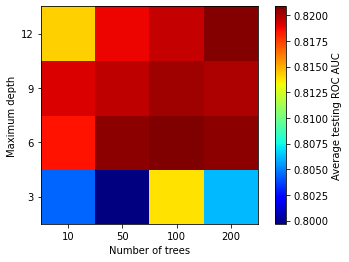

In [35]:
ax_rf = plt.axes()
pcolor_graph = ax_rf.pcolormesh(xx_rf, yy_rf, scores['mean_test_score'].reshape((4,4)), cmap=cm_rf)
plt.colorbar(pcolor_graph, label='Average testing ROC AUC')
ax_rf.set_aspect('equal')
ax_rf.set_xticks([0.5, 1.5, 2.5, 3.5])
ax_rf.set_yticks([0.5, 1.5, 2.5, 3.5])
ax_rf.set_xticklabels([str(tick_label) for tick_label in parameters['n_estimators']])
ax_rf.set_yticklabels([str(tick_label) for tick_label in parameters['max_depth']])
ax_rf.set_xlabel('Number of trees')
ax_rf.set_ylabel('Maximum depth')

________________________________________________________________________________________________________
**Conclude which set of hyperparameters to use.**

We can see that, max_depth=9 with 200 trees yields the best average testing score, which you can look up in the DataFrame and find is ROC AUC = 0.776. We conclude that max_depth=9 and n_estimators=200 is the optimal set of hyperparameters.

In [108]:
# Create a dataframe of the feature names and importance
feat_imp_df = pd.DataFrame({
    'Feature name':features_response[:-1],
    'Importance':grid_search.best_estimator_.feature_importances_
})
feat_imp_df

,Feature name,Importance
0,LIMIT_BAL,0.069733
1,EDUCATION,0.006983
2,MARRIAGE,0.004807
3,AGE,0.027330
4,PAY_1,0.416052
5,BILL_AMT1,0.041137
6,BILL_AMT2,0.043731
7,BILL_AMT3,0.039754
8,BILL_AMT4,0.031977
9,BILL_AMT5,0.034470


In [109]:
# Sort values by importance
feat_imp_df.sort_values('Importance', ascending=False)

,Feature name,Importance
4,PAY_1,0.416052
0,LIMIT_BAL,0.069733
11,PAY_AMT1,0.060201
12,PAY_AMT2,0.051145
6,BILL_AMT2,0.043731
13,PAY_AMT3,0.042729
5,BILL_AMT1,0.041137
7,BILL_AMT3,0.039754
14,PAY_AMT4,0.036891
9,BILL_AMT5,0.034470
